# Problem 1
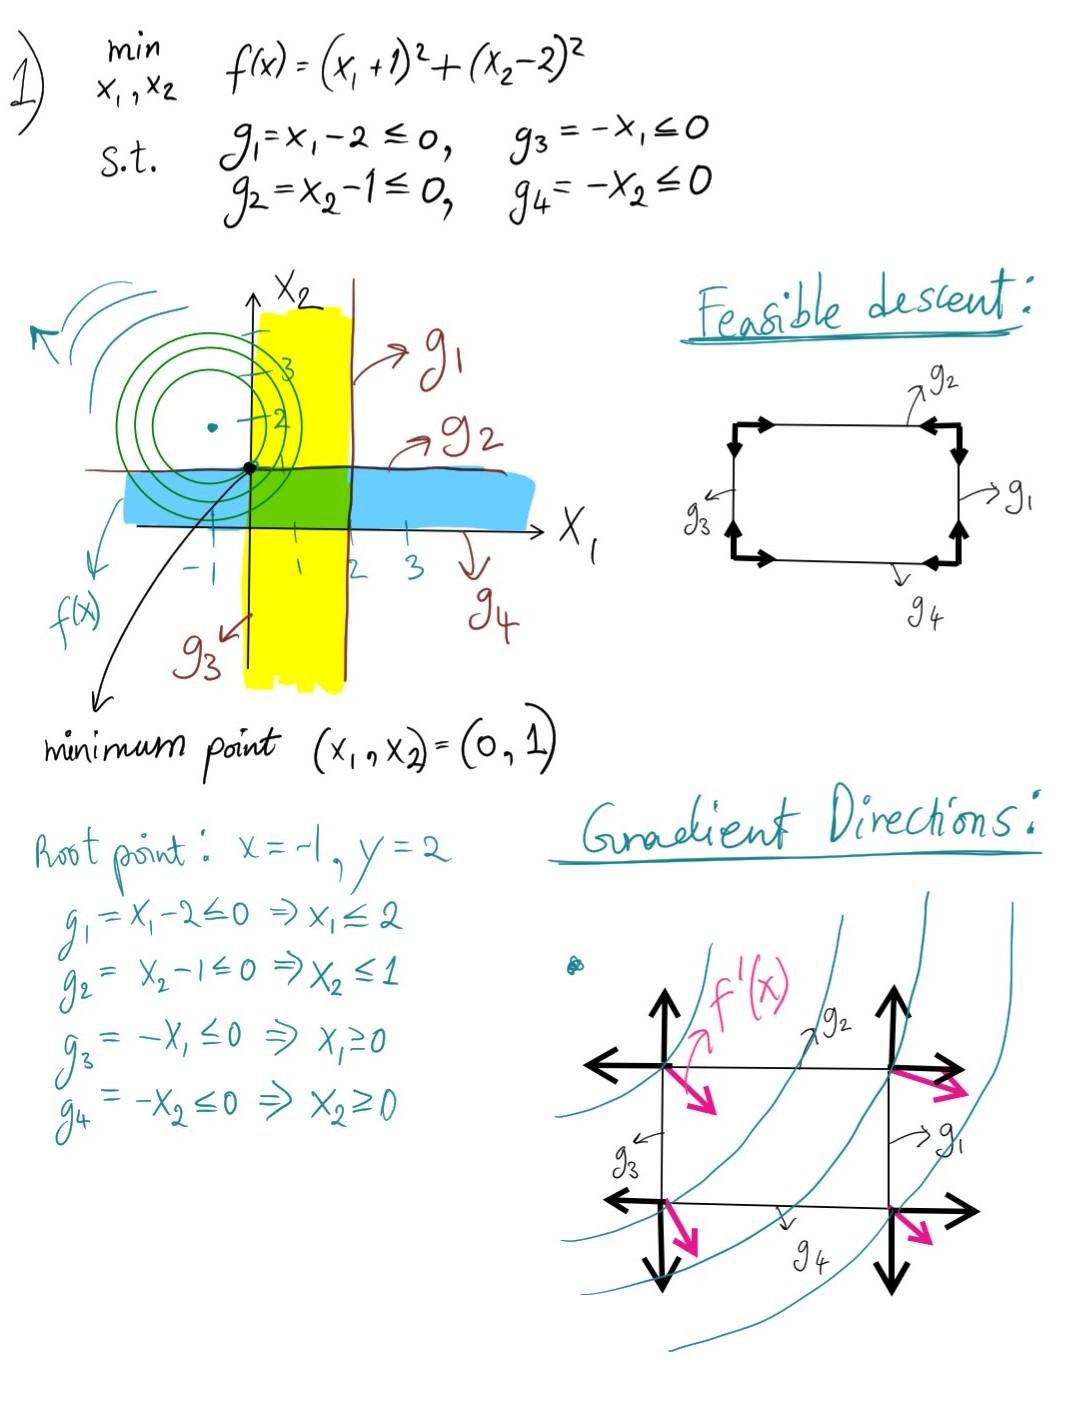

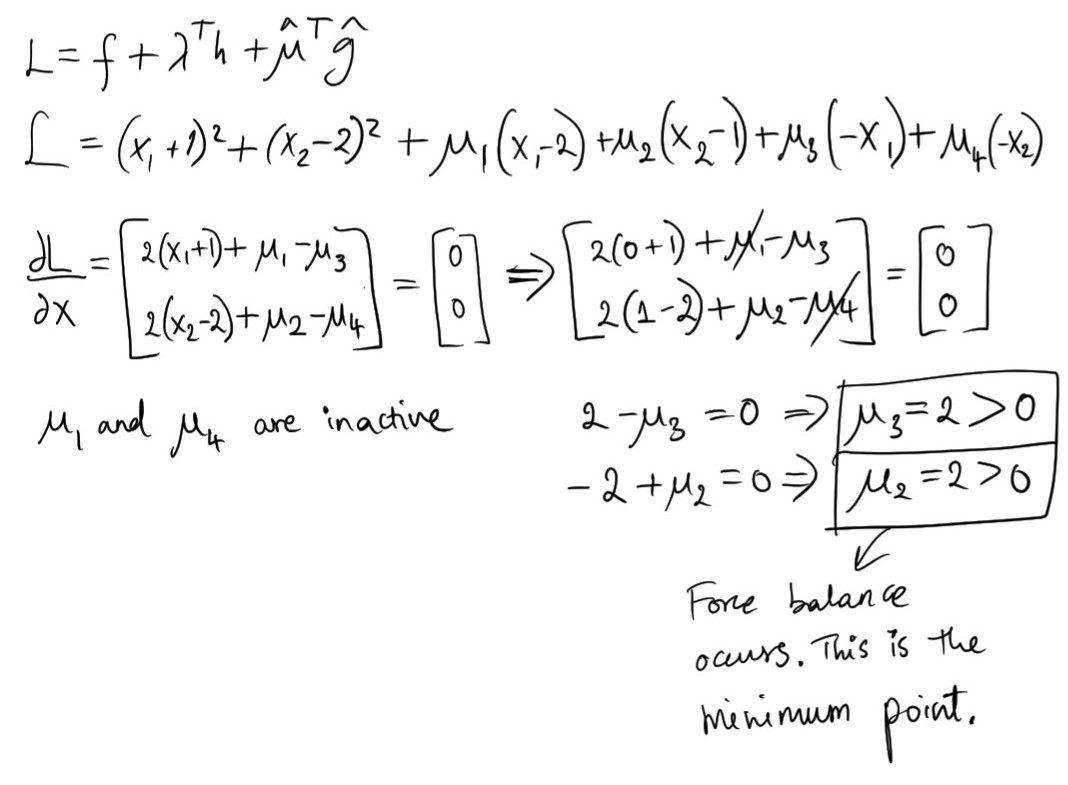

# Problem 2
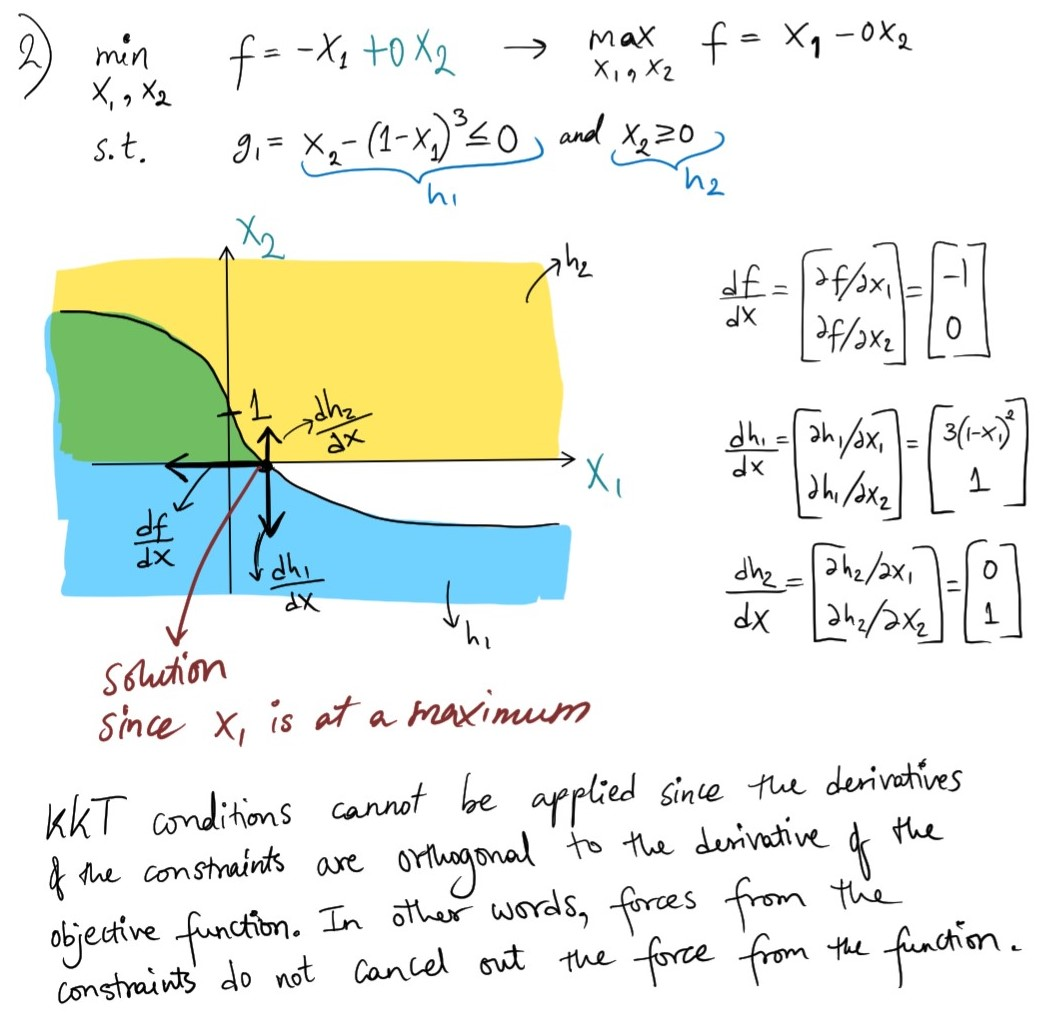

# Problem 3

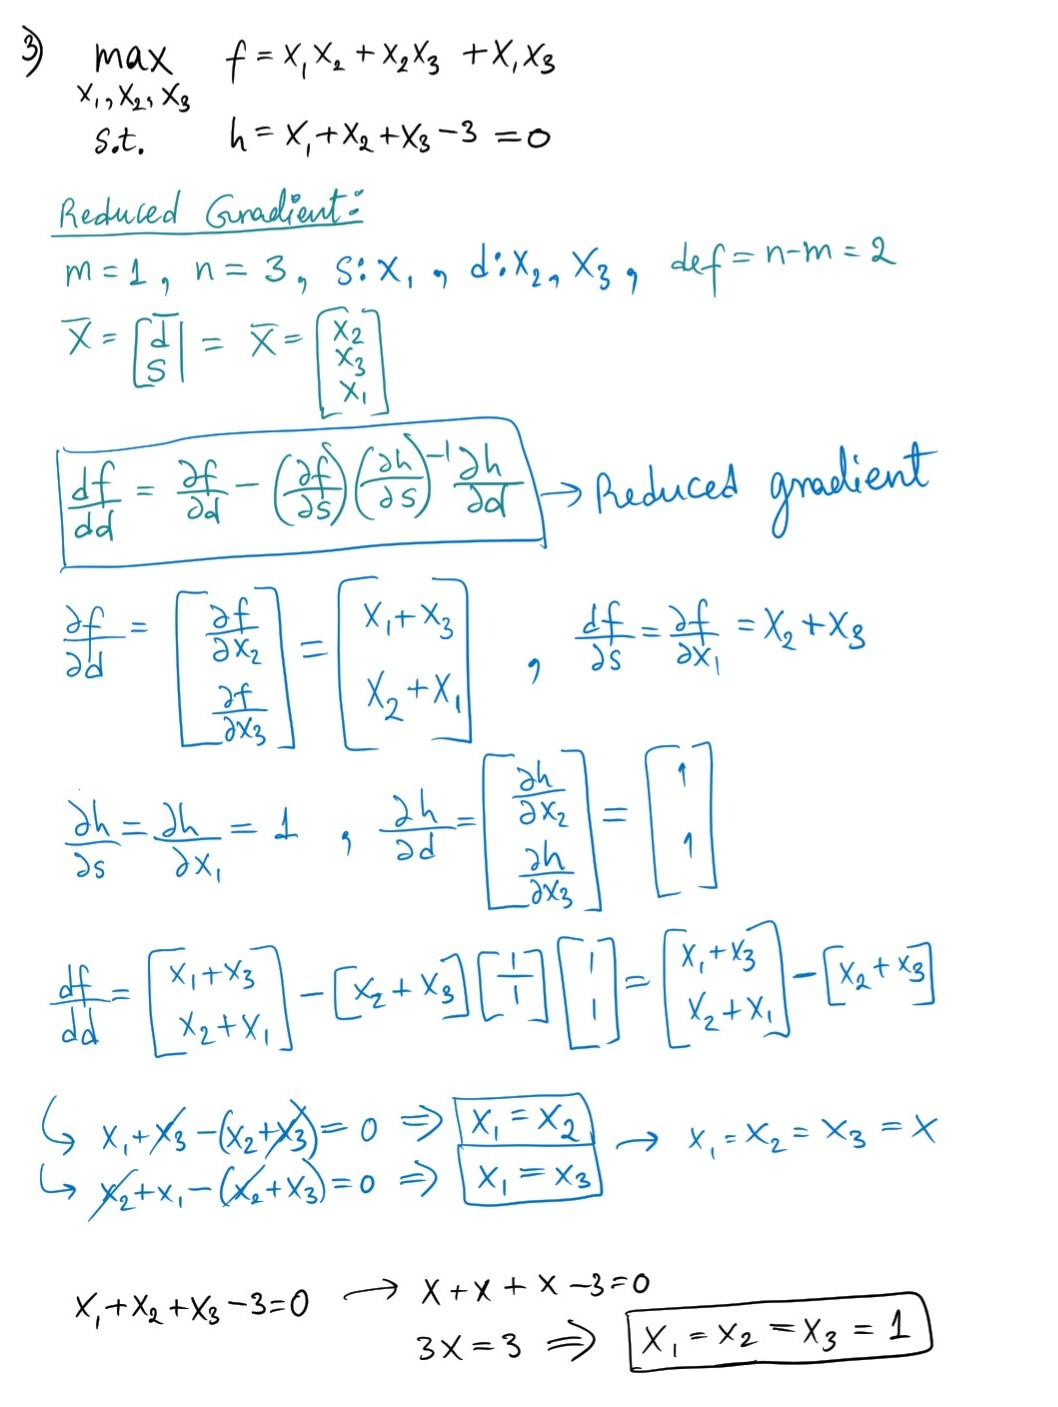

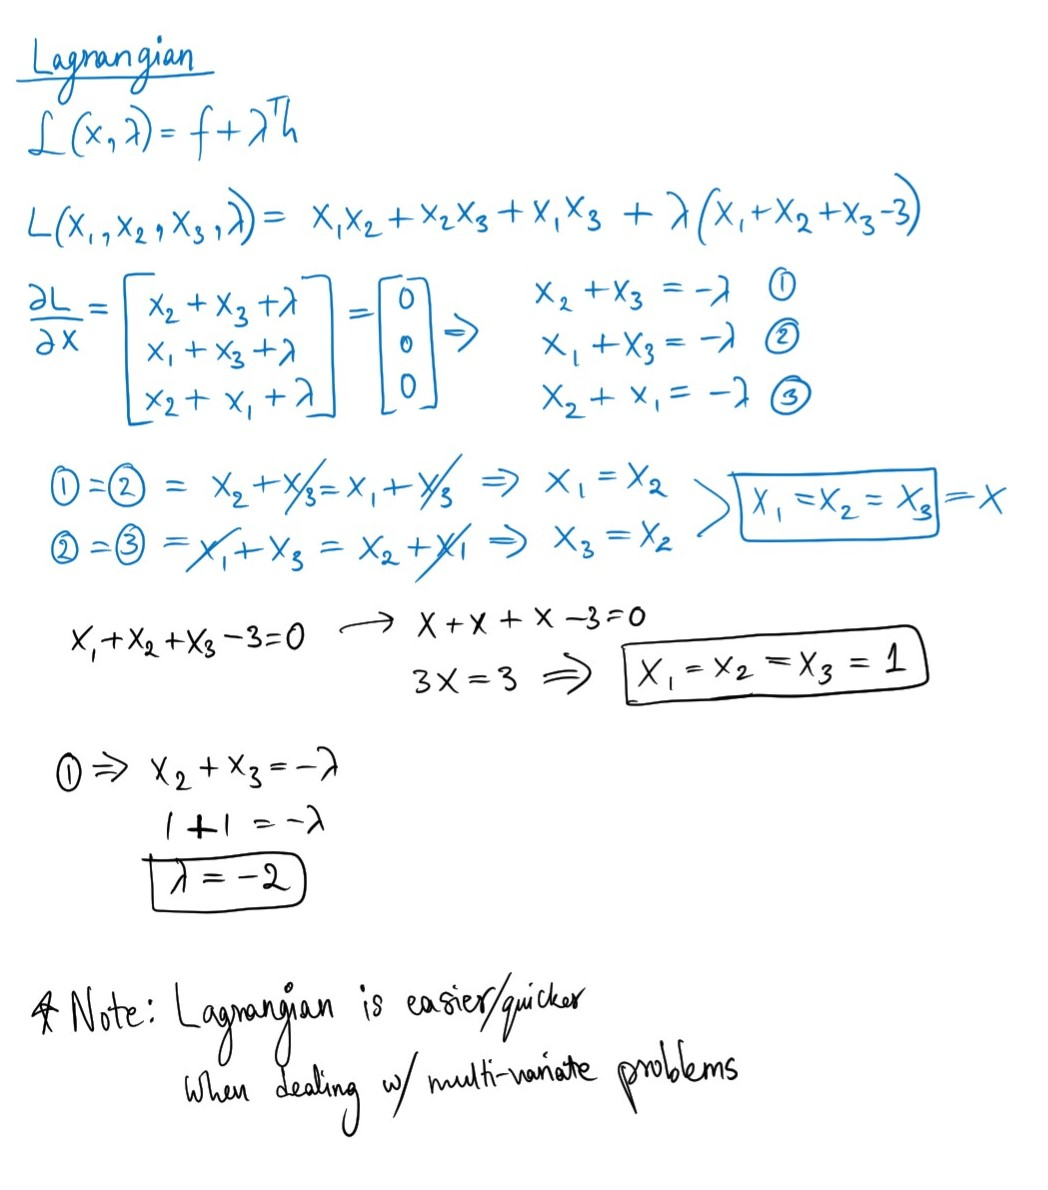

# Problem 4

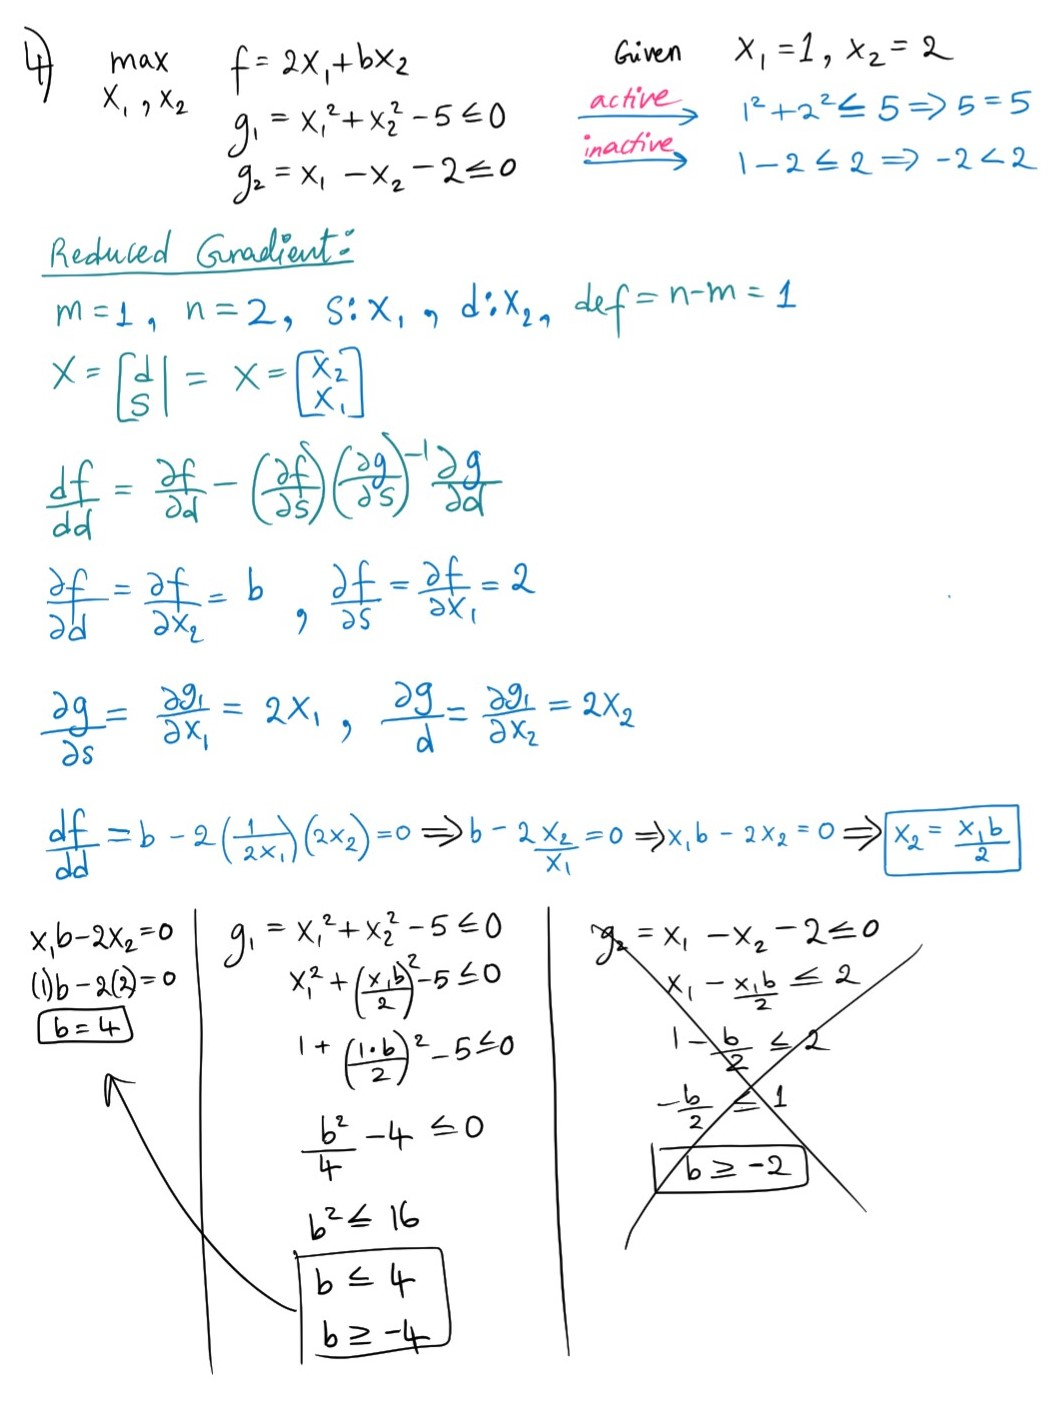

# Problem 5

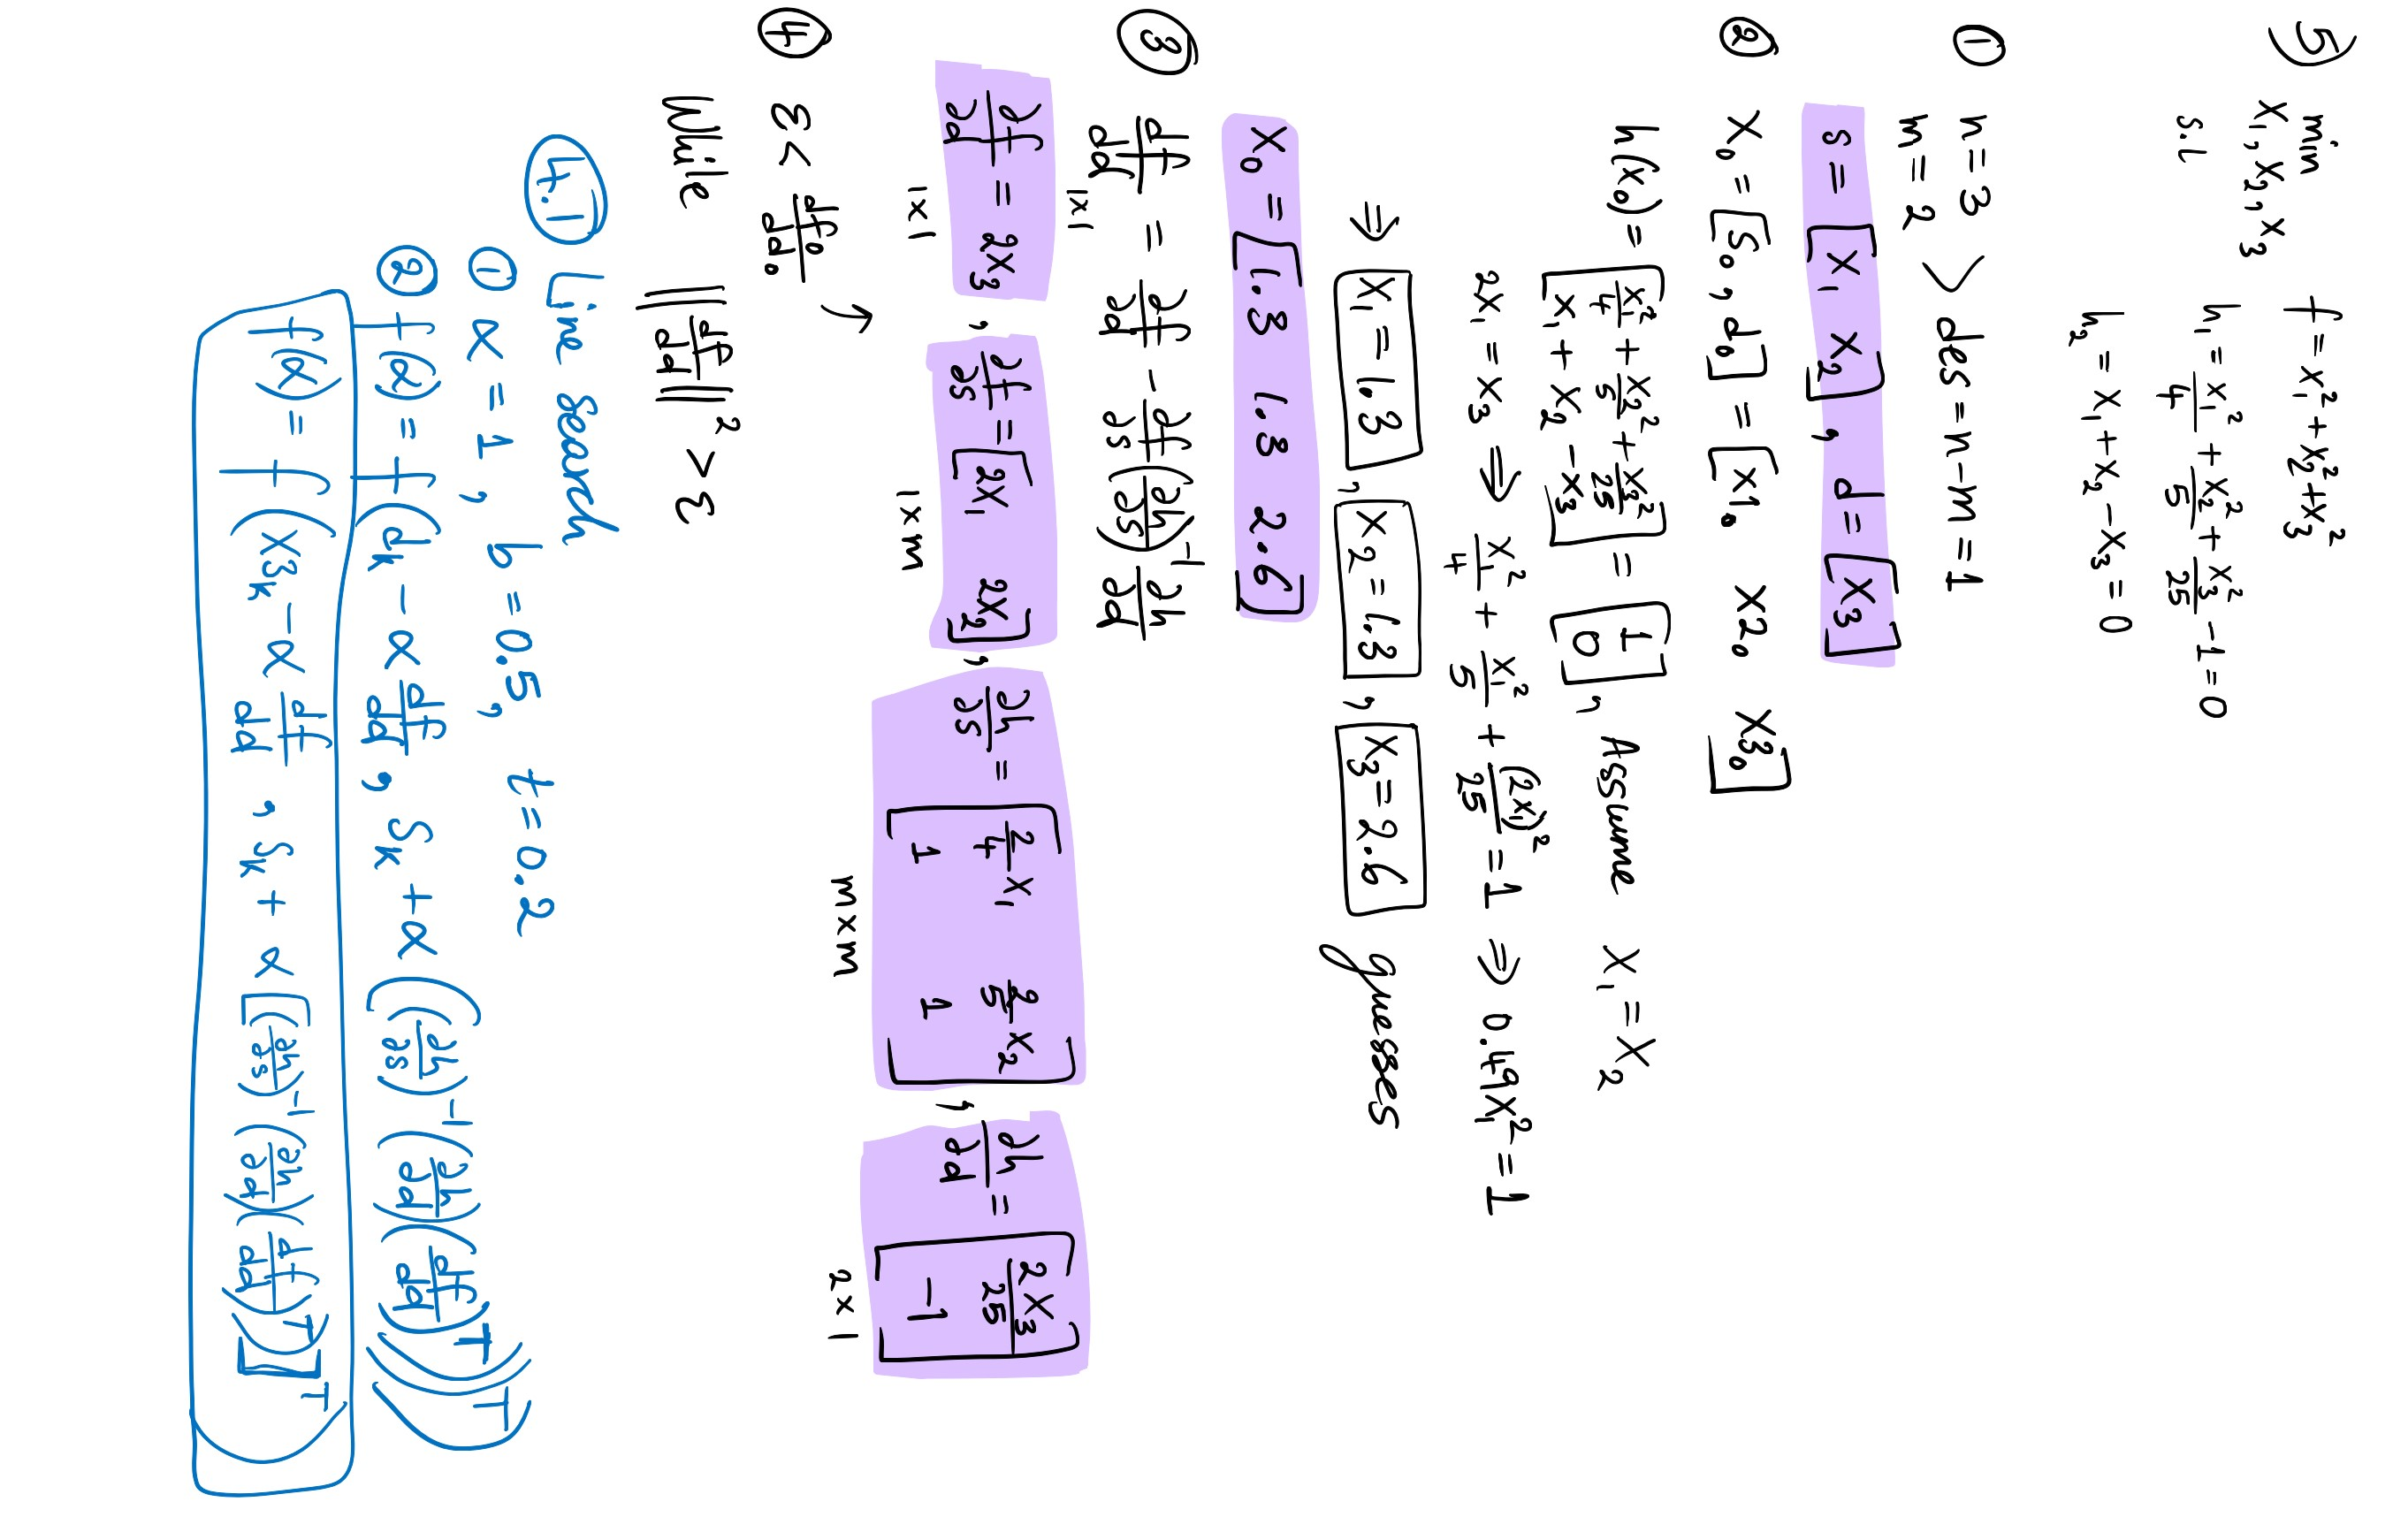

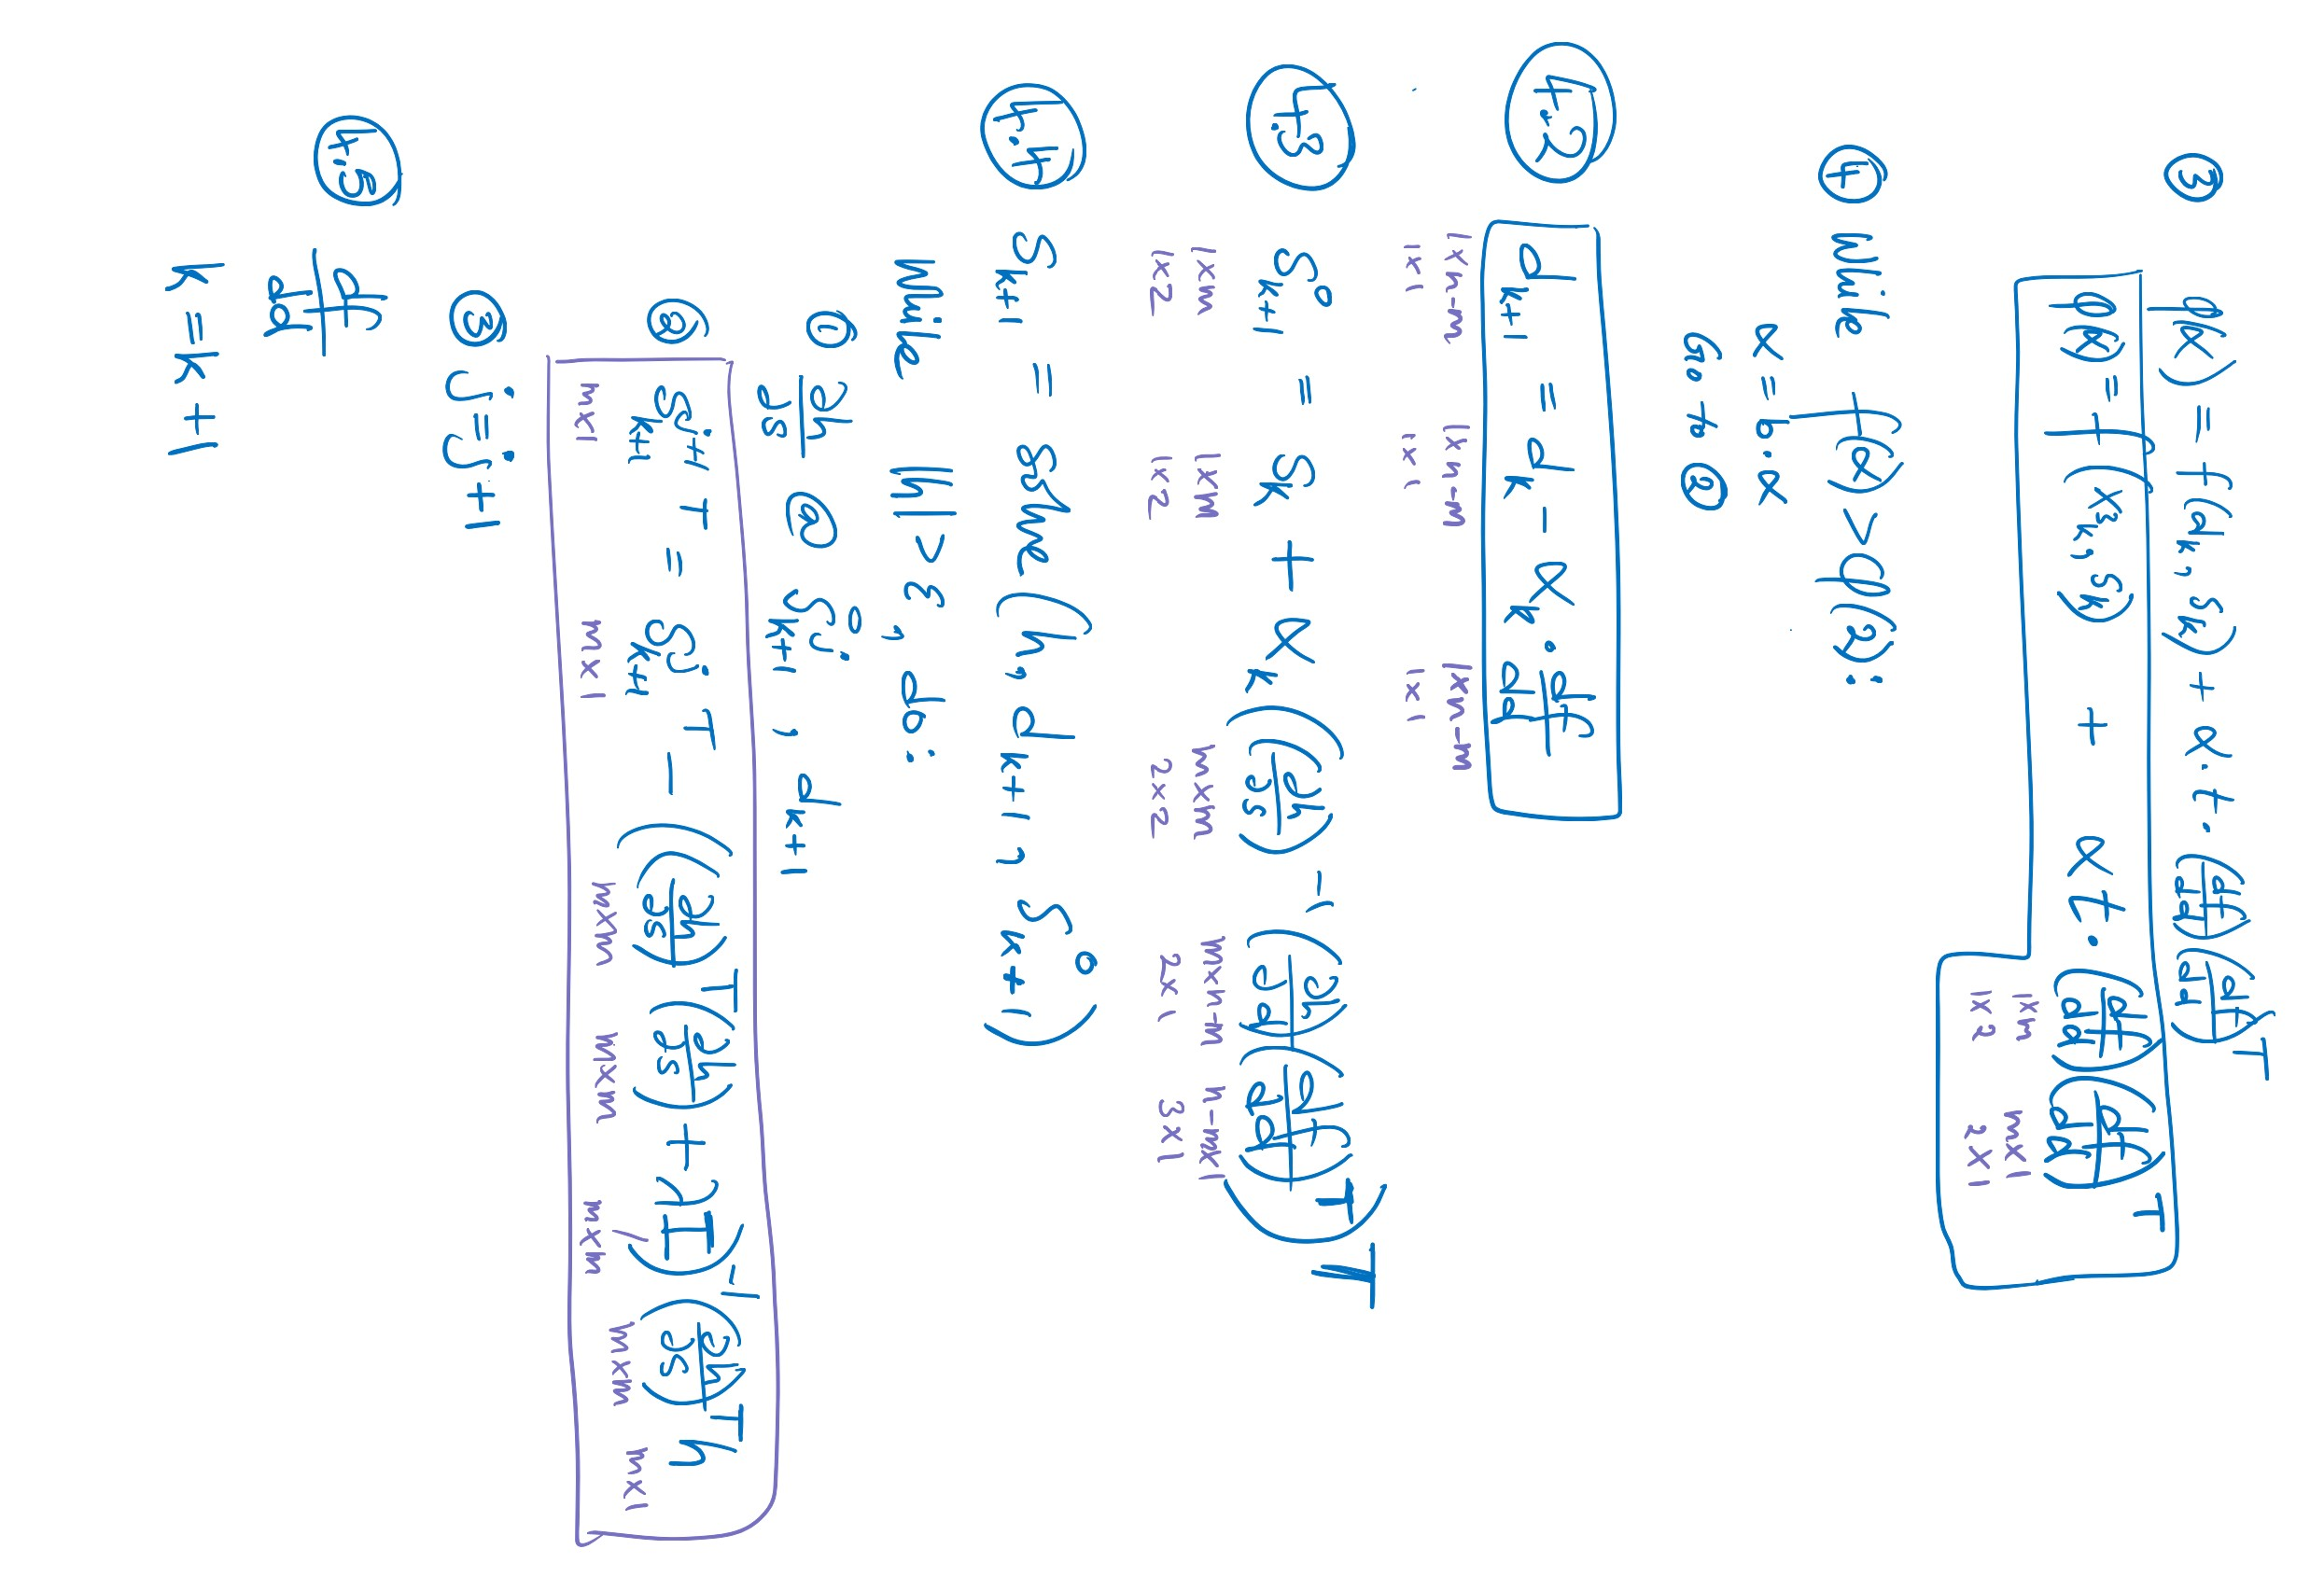

In [1]:
import numpy as np

# Part 1 and 2: State and Decision Variables
s0 = np.array([1.3, 1.3]);
d0 = 2.6;

In [2]:
# Part 3: df/dd 

pfpd = 2*d0;
pfps = np.array([2*s0[0], 2*s0[1]]);
phps = np.matrix([[(2/4)*s0[0],(2/5)*s0[1]], [1,1]]);
phpd = np.matrix([[(2/25)*d0],[-1]]);

phps_in = np.linalg.inv(phps);

dfdd = pfpd - pfps*phps_in*phpd;

In [3]:
# Part 4: 
    
err0 = 0.001;
err1 = 0.001;
a = 1;
b = 0.5;
t = 0.2;
lam = 1;

In [4]:
while dfdd > err0:

    # 4.1: Line Search--------------------------------------
    dfdd_t = np.matrix.transpose(dfdd); 
    v1 = (phps_in*phpd)*dfdd_t;
    v2 = np.matrix.transpose(v1); 
    
    sk = s0 + a*v2;
    dk = d0 - a*dfdd;
    
    f = sk[0,0]**2 + sk[0,1]**2 + dk**2;
    phi = f + a*t*dfdd*dfdd_t;
    
    while f > phi:
        a = b*a;
        
        sk = s0 + a*v2;
        dk = d0 - a*dfdd;
            
        f = sk[0,0]**2 + sk[0,1]**2 + dk**2;
        phi = f + a*t*dfdd*dfdd_t;
            
    # 4.2 and 4.3: New d and s------------------------------
    dk = dk - a*dfdd;
    sk = sk + a*v2;
    
    # 4.4: S_k+1--------------------------------------------
    h1 = (sk[0,0]**2)/4 + (sk[0,1]**2)/5 + (dk**2)/25 - 1;
    h2 = sk[0,0] + sk[0,1] - dk;
    h = np.array([h1,h2]);
    h_norm = np.sqrt(h1**2 + h2**2);
    
    j = 0;
    
    while h_norm > err1:
        phps = np.matrix([[(2/4)*sk[0,0],(2/5)*sk[0,1]], [1,1]]);
        phps_t = np.matrix.transpose(phps);
       
        v3 = phps_t*phps + lam*np.identity(2);
        v3_in = np.linalg.inv(v3)
        sk_t = np.matrix.transpose(sk);
        v4 = np.multiply(v3_in,phps_t);
        sk_t -= np.multiply(v4,h);
        sk = np.matrix.transpose(sk_t);
        
        h1 = sk[0,0]**2/4 + sk[0,1]**2/5 + dk**2/25 - 1;
        h2 = sk[0,0] + sk[0,1] - dk;
        h = np.matrix([[h1],[h2]]);
        h_norm = np.sqrt(h1**2 + h2**2);
        
        j += 1;

ValueError: shape too large to be a matrix.

In [5]:
# 4.5: New dfdd-----------------------------------------
pfpd = 2*d0;
pfps = np.array([2*sk[0], 2*sk[1]]);
phps = np.matrix([[(2/4)*sk[0],(2/5)*sk[1]], [1,1]]);
phpd = np.matrix([[(2/25)*dk],[-1]]);

phps_in = np.linalg.inv(phps);

dfdd = pfpd - pfps*phps_in*phpd;
k += 1;    
    
print(sk)
print(dk)       
          

IndexError: index 1 is out of bounds for axis 0 with size 1